In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
import numpy as np
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool, CatBoost
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [6]:
train_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
train_data.duplicated().sum()

0

In [71]:
for col in train_data.columns:
    print('Число уникальных значений в колонке {} - {}'.format(col, train_data[col].nunique()))

Число уникальных значений в колонке id - 165034
Число уникальных значений в колонке CustomerId - 23221
Число уникальных значений в колонке Surname - 2797
Число уникальных значений в колонке CreditScore - 457
Число уникальных значений в колонке Geography - 3
Число уникальных значений в колонке Gender - 2
Число уникальных значений в колонке Age - 71
Число уникальных значений в колонке Tenure - 11
Число уникальных значений в колонке Balance - 30075
Число уникальных значений в колонке NumOfProducts - 4
Число уникальных значений в колонке HasCrCard - 2
Число уникальных значений в колонке IsActiveMember - 2
Число уникальных значений в колонке EstimatedSalary - 55298
Число уникальных значений в колонке Exited - 2


In [72]:
for col in train_data.columns:
    unique_data_values = train_data[col].unique()
    print('Уникальные значения в кололнке {} - {}'.format(col, unique_data_values if len(unique_data_values) < 5 else 'Слишком много значений в колонке'))

Уникальные значения в кололнке id - Слишком много значений в колонке
Уникальные значения в кололнке CustomerId - Слишком много значений в колонке
Уникальные значения в кололнке Surname - Слишком много значений в колонке
Уникальные значения в кололнке CreditScore - Слишком много значений в колонке
Уникальные значения в кололнке Geography - ['France' 'Spain' 'Germany']
Уникальные значения в кололнке Gender - ['Male' 'Female']
Уникальные значения в кололнке Age - Слишком много значений в колонке
Уникальные значения в кололнке Tenure - Слишком много значений в колонке
Уникальные значения в кололнке Balance - Слишком много значений в колонке
Уникальные значения в кололнке NumOfProducts - [2 1 3 4]
Уникальные значения в кололнке HasCrCard - [1. 0.]
Уникальные значения в кололнке IsActiveMember - [0. 1.]
Уникальные значения в кололнке EstimatedSalary - Слишком много значений в колонке
Уникальные значения в кололнке Exited - [0 1]


# Первичный анализ

In [73]:
pd.pivot_table(train_data,
               index = 'Gender',
               columns= ['Geography', 'Exited'],
               values = ['Age'],
               aggfunc = [np.mean],
               fill_value=0,
               margins=True)

mean                                                         \
                 Age                                                          
Geography     France               Germany                 Spain              
Exited             0          1          0          1          0          1   
Gender                                                                        
Female     36.527087  43.923239  37.064149  44.471959  36.770610  43.987739   
Male       36.326825  43.448706  36.857323  44.056542  36.641191  43.636730   
All        36.405700  43.723029  36.941932  44.297163  36.693053  43.834162   

                      
                      
Geography        All  
Exited                
Gender                
Female     38.763207  
Male       37.634068  
All        38.125888

In [17]:
data_cat = ['Exited', 'IsActiveMember', 'HasCrCard', 'NumOfProducts', 'Gender', 'Geography', 'Tenure']
data_num = ['CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

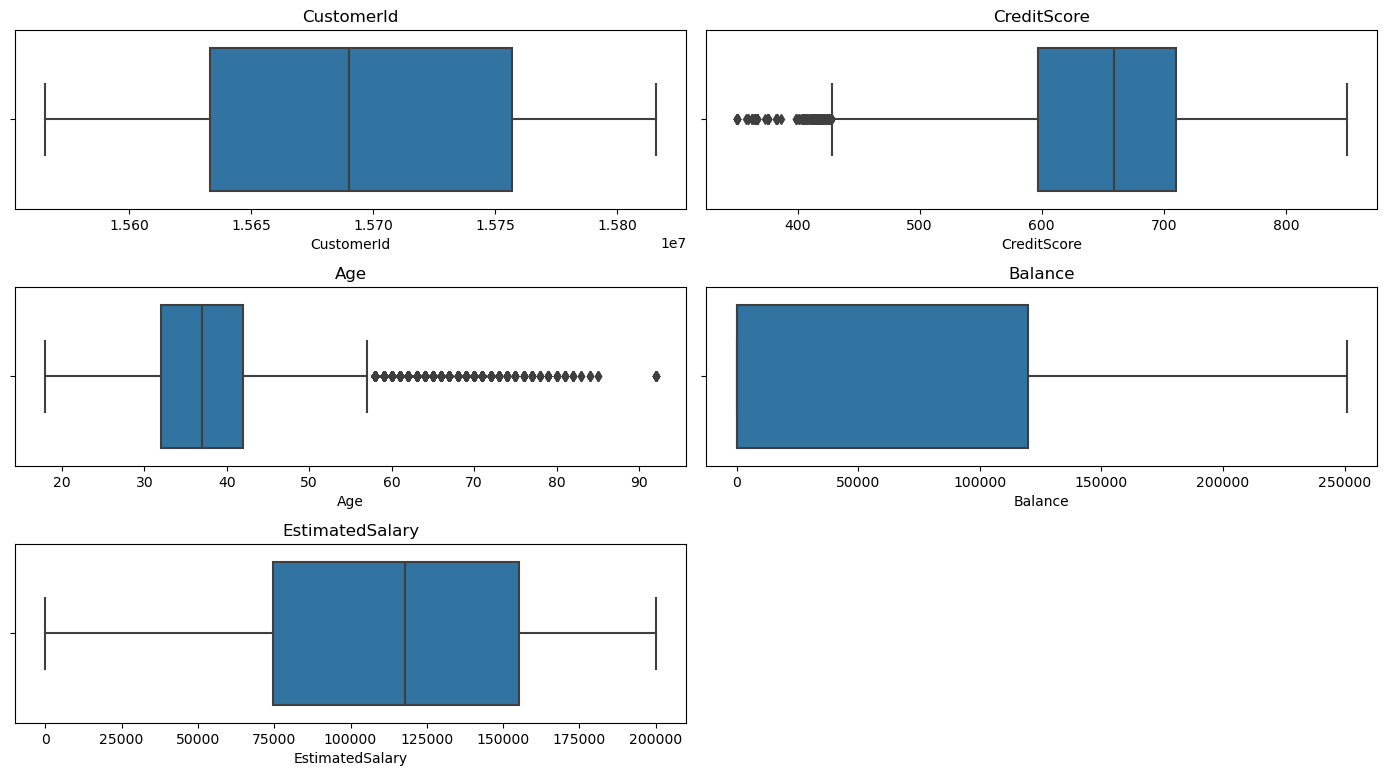

In [18]:
plt.figure(figsize=(14, 10)) 

for index, col in enumerate(data_num):
    plt.subplot(4, 2, index+1)
    sns.boxplot(data=train_data, x=col)
    plt.title(col)

plt.tight_layout() 
plt.show()

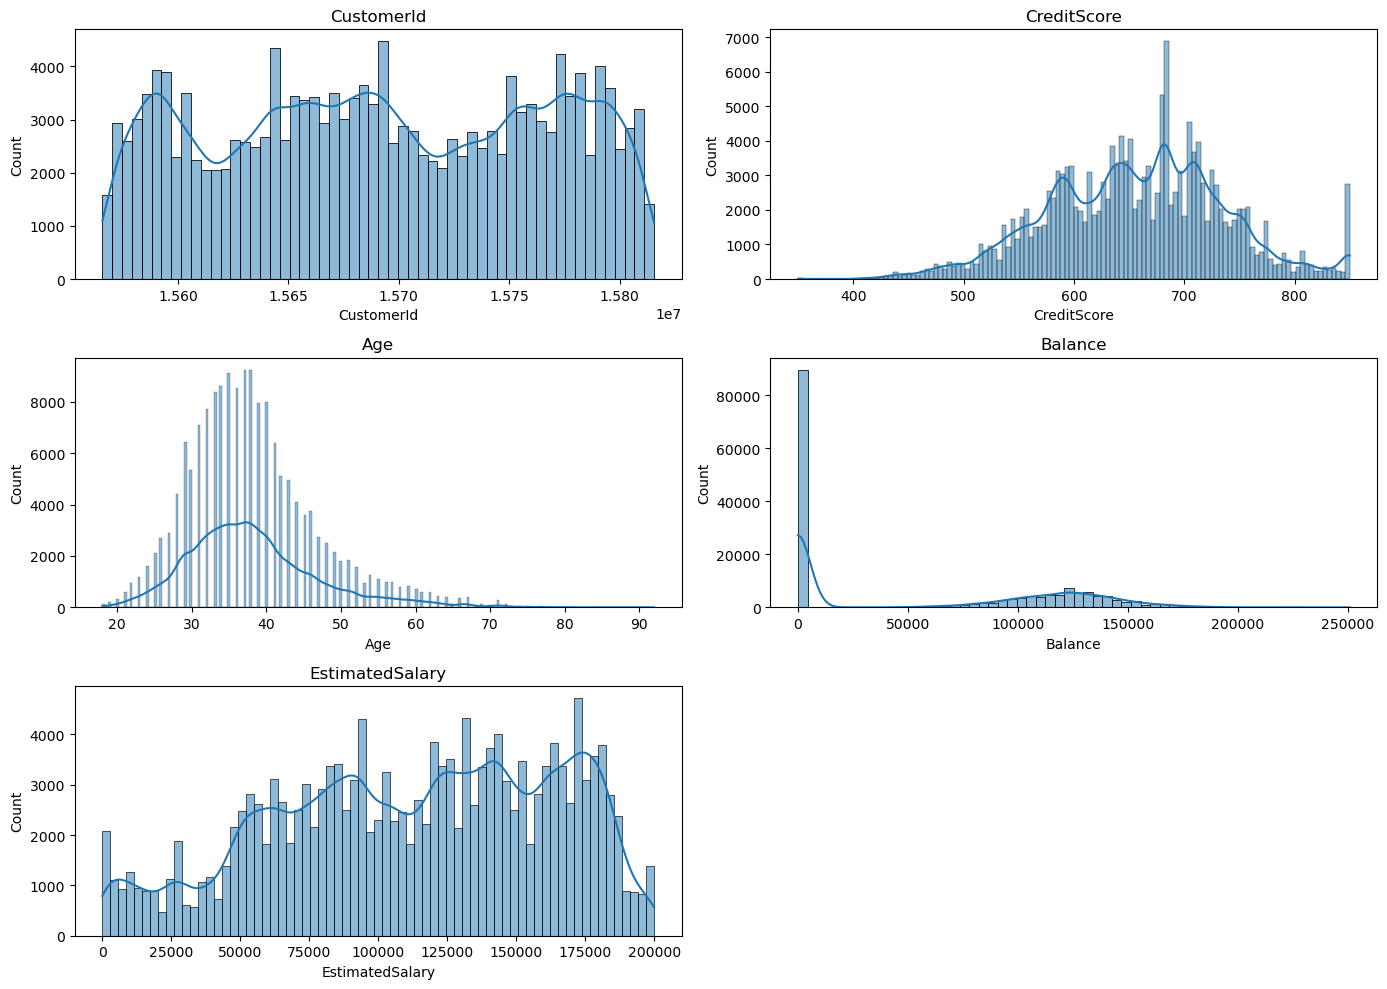

In [26]:
plt.figure(figsize=(14, 10)) 

for index, col in enumerate(data_num):
    plt.subplot(3, 2, index+1)
    sns.histplot(data=train_data, x=col, kde=True)
    plt.title(col)

plt.tight_layout() 
plt.show()

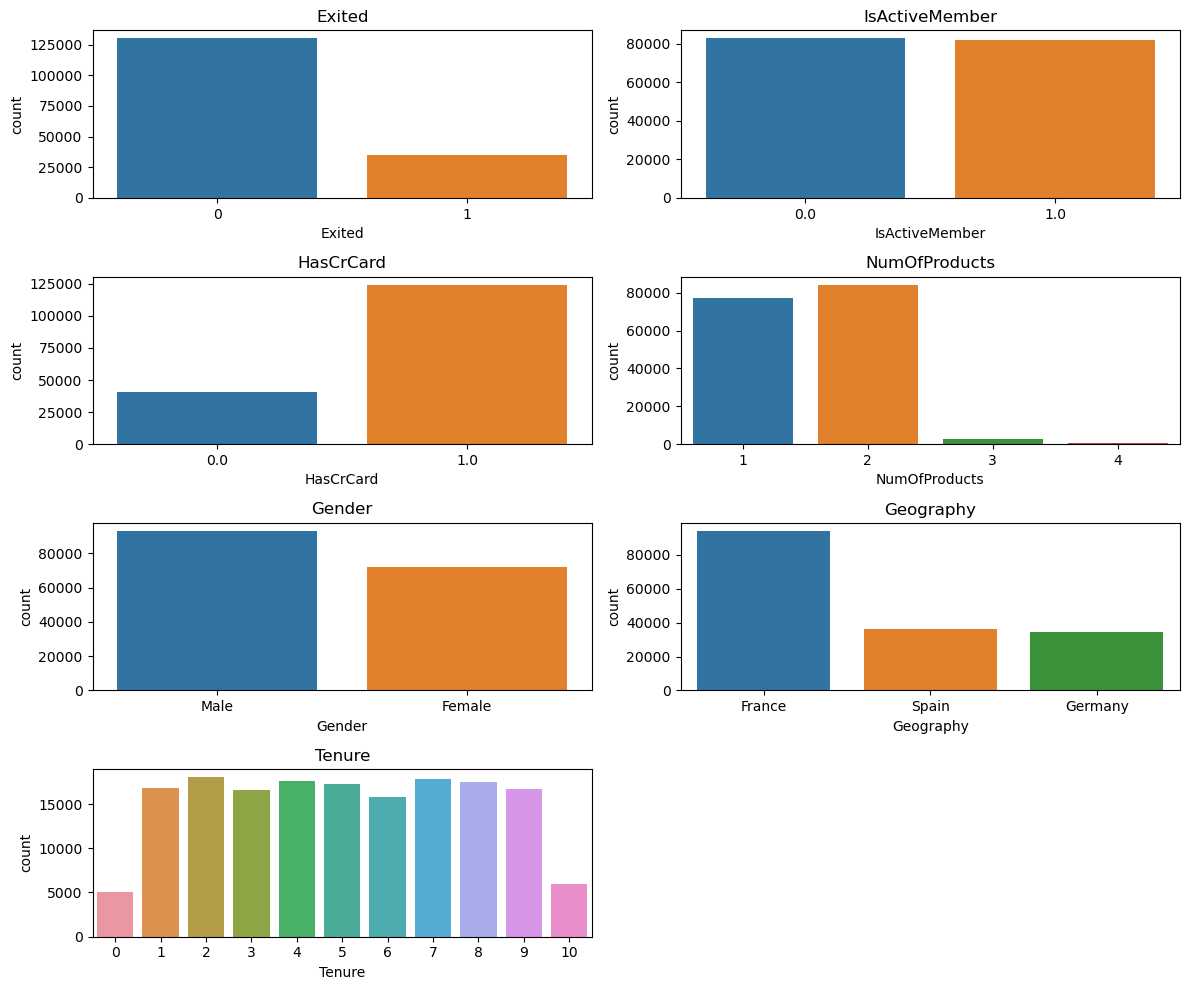

In [31]:
plt.figure(figsize=(12, 10)) 

for index, col in enumerate(data_cat):
    plt.subplot(4, 2, index+1)
    sns.countplot(data=train_data, x=col)
    plt.title(col)

plt.tight_layout() 
plt.show()

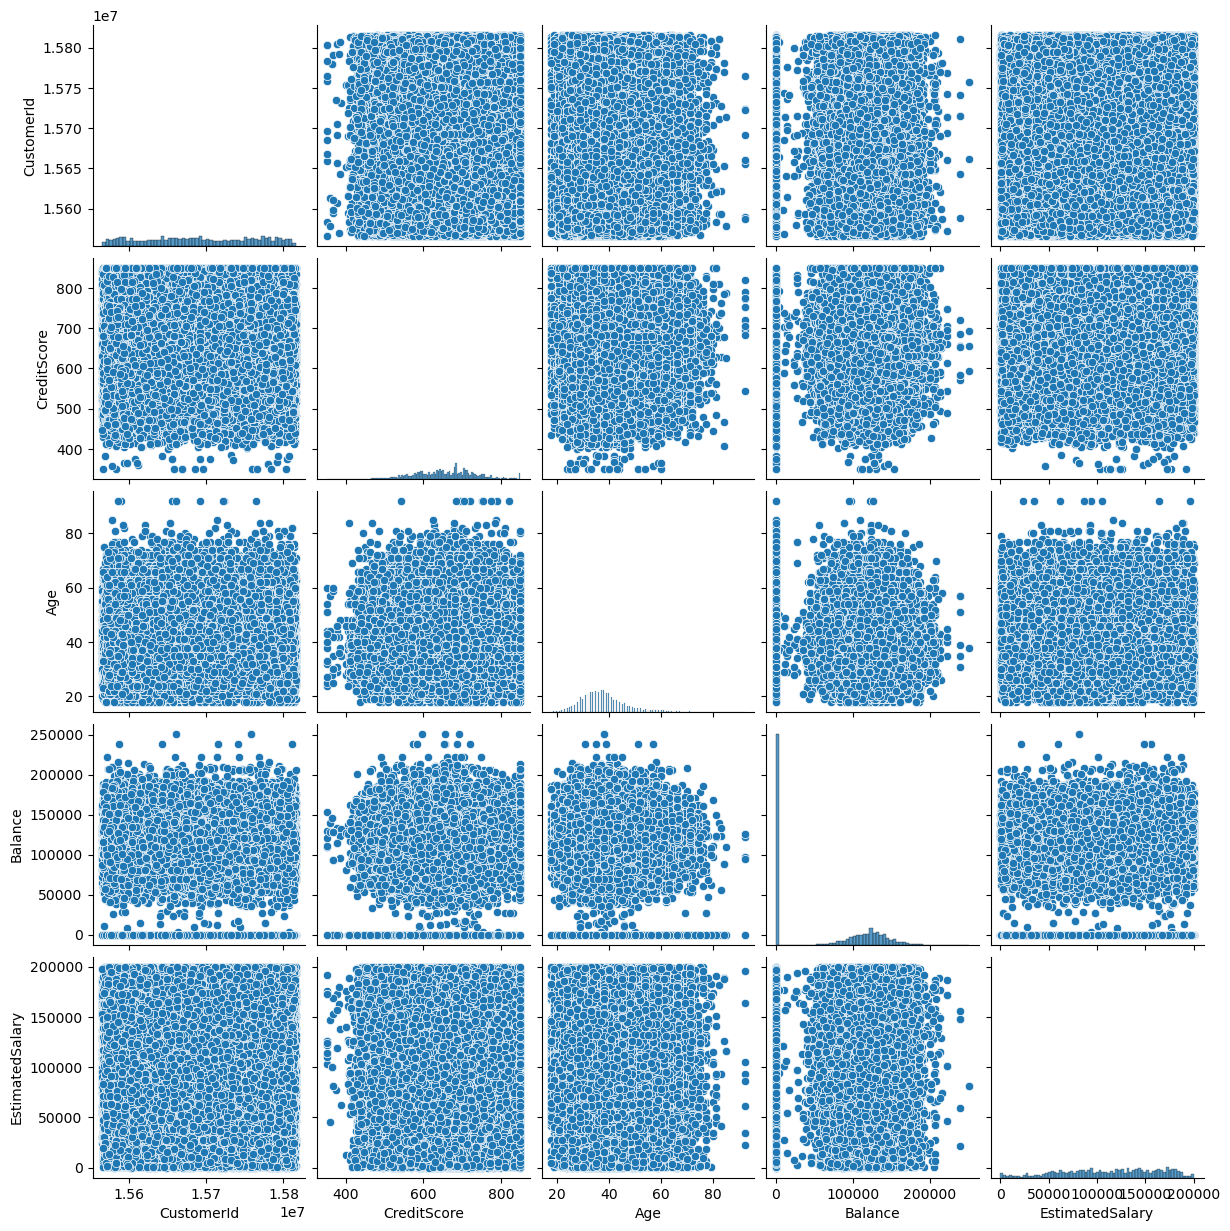

In [32]:
sns.pairplot(train_data.loc[:, data_num]);

In [10]:
df_corr = train_data.select_dtypes(include=['float', 'int']).drop(['Exited', 'CustomerId'], axis=1)

In [41]:
df_corr.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820
Age,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399
Tenure,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971
Balance,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586
NumOfProducts,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285
HasCrCard,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438
IsActiveMember,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080
EstimatedSalary,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000


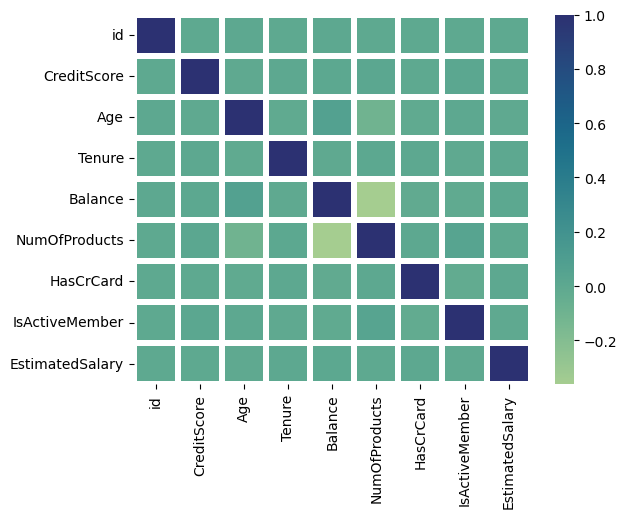

In [12]:
sns.heatmap(df_corr.corr(), cmap="crest", linewidths=3);

# Обработка 

In [8]:
def filtering_and_preprocessing_data(dataset, is_train=True):
    dataset.drop(['id','Surname', 'CustomerId'], axis=1, inplace=True)
    dataset['Geography'] = dataset['Geography'].map({'France': 0, 'Spain':1, 'Germany': 2})
    dataset['Gender'] = dataset['Gender'].map({'Female': 0, 'Male':1})
    dataset['BalanceZero'] =  (dataset['Balance'] == 0).astype(int)
    
    if is_train:
        X = dataset.drop('Exited', axis=1)
        y = dataset['Exited']
        print('The separation and filtering was successful! X:{} y:{}'.format(X.shape, y.shape))
        return X, y
    else:
        return dataset

In [9]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [10]:
X, y = filtering_and_preprocessing_data(train_data)

The separation and filtering was successful! X:(165034, 11) y:(165034,)


In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceZero
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,1
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,1
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,1
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,1,1,33.0,5,0.00,2,1.0,1.0,15068.83,1


In [12]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [13]:
X_res.shape, y_res.shape

((260226, 11), (260226,))

In [14]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_res)
y = y_res.to_numpy()

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, train_size=.8, shuffle=True, random_state=42)

In [16]:
X_train.shape, X_val.shape

((208180, 11), (52046, 11))

# Обучение модели

In [22]:
def metrics(y_pred, y):
    accuracy = accuracy_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print('Accuracy = {:2f} | ROC-AUC = {:2f} | Recall = {:2f} | Precision = {:2f} | F1 = {:2f}'.format(accuracy, roc_auc, recall, precision, f1))
    #return accuracy, roc_auc, recall, precision, f1

In [108]:
n_est = [100, 300, 600, 800, 1000]
max_depths = [3, 5, 7, 9, 13]
learning_rate = [0.001, 0.01, 0.1, 0.2]

number_iter = 0
best_score = 0
best_params = {}
best_model = None

for n in n_est:
    for depth in max_depths:
        for lr in learning_rate:
            number_iter+=1
            xgboost_classifier = XGBClassifier(n_estimators=n, max_depth=depth, learning_rate=lr, device='cuda', random_state=42)
            xgboost_classifier.fit(X_train, y_train)

            y_pred_xgboost_classifier = xgboost_classifier.predict(X_val)
            accuracy, roc_auc, recall, precision, f1 = metrics(y_val, y_pred_xgboost_classifier)

            if accuracy > best_score:
                best_score = accuracy
                best_params['n_estimators'] = n
                best_params['max_depth'] = depth
                best_params['learning_rate'] = lr
                best_model = xgboost_classifier
             
            print('[{} | 100] Val: Accuracy = {:2f} | ROC-AUC {:2f} | Recall = {:2f} | Precision = {:2f} | F1 = {:2f}'.format(number_iter, roc_auc, accuracy, recall, precision, f1))

[1 | 100] Val: Accuracy = 0.809187 | ROC-AUC 0.807805 | Recall = 0.788659 | Precision = 0.841270 | F1 = 0.814116
[2 | 100] Val: Accuracy = 0.842531 | ROC-AUC 0.841775 | Recall = 0.826577 | Precision = 0.865274 | F1 = 0.845483
[3 | 100] Val: Accuracy = 0.880460 | ROC-AUC 0.880202 | Recall = 0.890515 | Precision = 0.867156 | F1 = 0.878680
[4 | 100] Val: Accuracy = 0.889164 | ROC-AUC 0.888714 | Recall = 0.902537 | Precision = 0.871688 | F1 = 0.886844
[5 | 100] Val: Accuracy = 0.842284 | ROC-AUC 0.842197 | Recall = 0.836969 | Precision = 0.850181 | F1 = 0.843523
[6 | 100] Val: Accuracy = 0.849432 | ROC-AUC 0.849402 | Recall = 0.852768 | Precision = 0.844842 | F1 = 0.848787
[7 | 100] Val: Accuracy = 0.889095 | ROC-AUC 0.888675 | Recall = 0.902018 | Precision = 0.872225 | F1 = 0.886871
[8 | 100] Val: Accuracy = 0.898386 | ROC-AUC 0.897552 | Recall = 0.916754 | Precision = 0.874645 | F1 = 0.895204
[9 | 100] Val: Accuracy = 0.864426 | ROC-AUC 0.864197 | Recall = 0.855430 | Precision = 0.876719

[73 | 100] Val: Accuracy = 0.878666 | ROC-AUC 0.878281 | Recall = 0.890886 | Precision = 0.862317 | F1 = 0.876369
[74 | 100] Val: Accuracy = 0.897784 | ROC-AUC 0.896937 | Recall = 0.916277 | Precision = 0.873838 | F1 = 0.894555
[75 | 100] Val: Accuracy = 0.902863 | ROC-AUC 0.901991 | Recall = 0.921760 | Precision = 0.878677 | F1 = 0.899703
[76 | 100] Val: Accuracy = 0.899846 | ROC-AUC 0.899243 | Recall = 0.915514 | Precision = 0.879791 | F1 = 0.897297
[77 | 100] Val: Accuracy = 0.889079 | ROC-AUC 0.888387 | Recall = 0.905635 | Precision = 0.867271 | F1 = 0.886038
[78 | 100] Val: Accuracy = 0.900295 | ROC-AUC 0.899320 | Recall = 0.920196 | Precision = 0.874606 | F1 = 0.896822
[79 | 100] Val: Accuracy = 0.902070 | ROC-AUC 0.901395 | Recall = 0.918689 | Precision = 0.880866 | F1 = 0.899380
[80 | 100] Val: Accuracy = 0.899878 | ROC-AUC 0.899320 | Recall = 0.914964 | Precision = 0.880598 | F1 = 0.897452
[81 | 100] Val: Accuracy = 0.842531 | ROC-AUC 0.841775 | Recall = 0.826577 | Precision =

In [110]:
best_params

{'n_estimators': 600, 'max_depth': 9, 'learning_rate': 0.1}

In [181]:
y_pred = best_model.predict(X_val)
metrics(y_pred, y_val)

Accuracy = 0.910541 | ROC-AUC = 0.910559 | Recall = 0.879138 | Precision = 0.938156 | F1 = 0.907689


# CatBoost

In [18]:
n_iter = [800, 1000, 1200]
max_depths = [3, 5, 7, 9, 13]
learning_rate = [0.001, 0.01, 0.1]
l2_values = [0.1, 1.0, 3, 10.0]

number_iter = 0
best_score = 0
best_params = {}
best_model = None

for i in n_iter:
    for depth in max_depths:
        for lr in learning_rate:
            for l2 in l2_values:
                number_iter+=1
                params = {
                'iterations':i,
                'learning_rate':lr,
                'max_depth': depth,
                'verbose' : False,
                'task_type': 'GPU',
                'boosting_type': 'Ordered',
                "leaf_estimation_method":'Newton',
                'l2_leaf_reg': l2
                }
                
                booster = CatBoostClassifier(**params)
                booster.fit(X_train, y_train)
                val_preds = booster.predict(X_val)
                accuracy, roc_auc, recall, precision, f1 = metrics(val_preds, y_val)

                if roc_auc > best_score:
                    best_score = roc_auc
                    best_params['iterations'] = n
                    best_params['max_depth'] = depth
                    best_params['learning_rate'] = lr
                    best_params['l2'] = l2
                    best_model = booster

                print('[{} | 180] Val: Accuracy = {:2f} | ROC-AUC {:2f} | Recall = {:2f} | Precision = {:2f} | F1 = {:2f}'.format(number_iter, roc_auc, accuracy, recall, precision, f1))


In [63]:
params = {
        'iterations':800,
        'learning_rate':0.1,
        'max_depth': 7,
        'verbose' : False,
        'task_type': 'GPU',
        'boosting_type': 'Ordered',
        "leaf_estimation_method":'Newton',
        'l2_leaf_reg': 1.0
}

model = CatBoostClassifier(**params)
model.fit(X_train, y_train)

In [64]:
y_pred_cat_boost = model.predict(X_val)

In [66]:
metrics(y_pred_cat_boost, y_val)

Accuracy = 0.910387 | ROC-AUC = 0.910406 | Recall = 0.876949 | Precision = 0.939903 | F1 = 0.907335


# Test

In [24]:
sample_sub = pd.read_csv('data/sample_submission.csv')

In [25]:
sample_sub.head(10)

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5
5,165039,0.5
6,165040,0.5
7,165041,0.5
8,165042,0.5
9,165043,0.5


In [26]:
id_ = test_data['id']

In [27]:
X_test = filtering_and_preprocessing_data(test_data, is_train=False)
X_test_norm = scaler.transform(X_test)

In [28]:
X_test.shape

(110023, 11)

In [29]:
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceZero
0,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75,1
1,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27,1
2,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09,1
3,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57,1
4,752,2,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0


In [31]:
y_pred_test = model.predict_proba(X_test_norm)[:,1]

In [32]:
sumbission = pd.DataFrame({'id': id_, 'Exited': y_pred_test})

In [33]:
sumbission.tail(3)

,id,Exited
110020,275054,0.023409
110021,275055,0.146942
110022,275056,0.270360


In [34]:
sumbission.to_csv('sumbission_cat_standard_scaler.csv',index=False)